# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [ ]:
# Load the dataset
df = pd.read_csv('data\Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Acer\AppData\Local\Temp\ipykernel_3432\4216540557.py:2: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv('data\Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)


,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [ ]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


In [ ]:
# TODO: Aggregate data by year to create a 124-year time series
# Your code here
# Convert date column to datetime if applicable
# Aggregate data by year, taking the mean of each variable
df_aggregated = df.groupby('Year').mean().reset_index()
# Ensure the DataFrame is sorted by Year for time series analysis
df_aggregated = df_aggregated.sort_values('Year').reset_index(drop=True)
# Display the first few rows of the aggregated dataset
df_aggregated.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1900,14.506663,350.373405,150.408288,8.978659
1,1901,14.485343,349.757140,150.548828,8.947272
2,1902,14.476262,349.299686,152.174821,9.035554
3,1903,14.492360,349.644375,150.138338,9.056501
4,1904,14.494241,349.537032,150.667318,8.990691


## 2. Univariate Analysis

Analyze each climate variable independently.

Descriptive Statistics:
              Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
count   124.000000                       124.000000               124.000000   
mean   1961.500000                        14.499538               350.028626   
std      35.939764                         0.009960                 0.456535   
min    1900.000000                        14.474559               348.642249   
25%    1930.750000                        14.492782               349.691692   
50%    1961.500000                        14.499496               350.022334   
75%    1992.250000                        14.504872               350.367023   
max    2023.000000                        14.527762               351.003294   

       Sea Level Rise (mm)  Arctic Ice Area (million km²)  
count           124.000000                     124.000000  
mean            149.988859                       9.000886  
std               1.032095                       0.037547  
min            

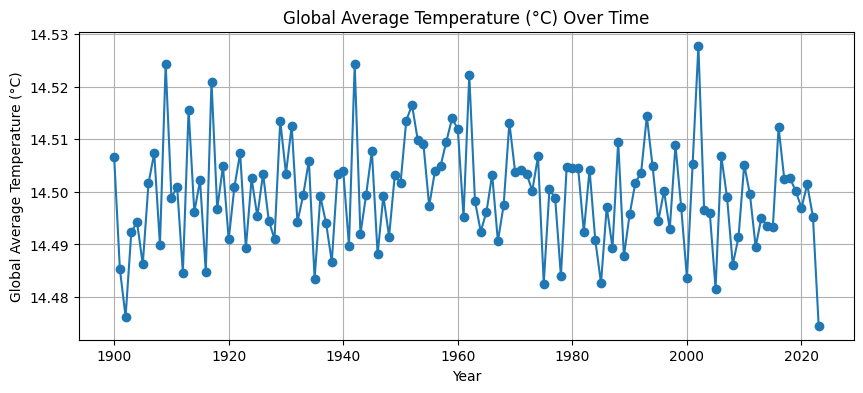

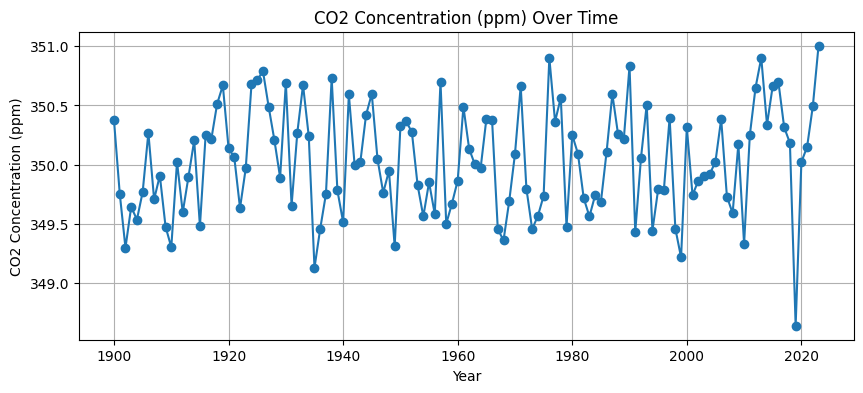

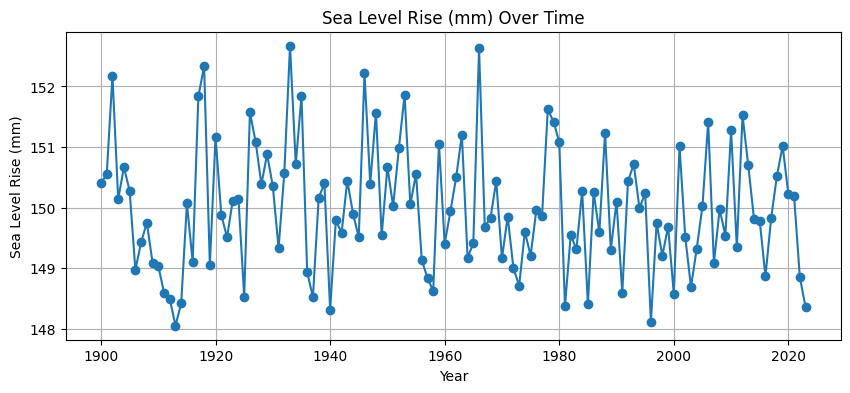

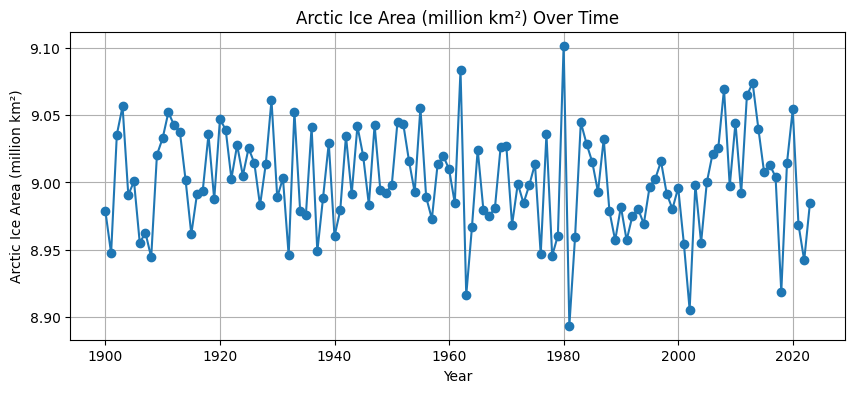

In [ ]:
# TODO: Perform univariate analysis for each climate variable
# Include descriptive statistics and appropriate visualizations
# Your code here
# Descriptive statistics
print("Descriptive Statistics:")
print(df_aggregated.describe())

# Plotting time series for each variable
variables = ['Global Average Temperature (°C)', 'CO2 Concentration (ppm)', 
             'Sea Level Rise (mm)', 'Arctic Ice Area (million km²)']

for var in variables:
    plt.figure(figsize=(10, 4))
    plt.plot(df_aggregated['Year'], df_aggregated[var], marker='o', linestyle='-')
    plt.title(f'{var} Over Time')
    plt.xlabel('Year')
    plt.ylabel(var)
    plt.grid(True)
    plt.show()

## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

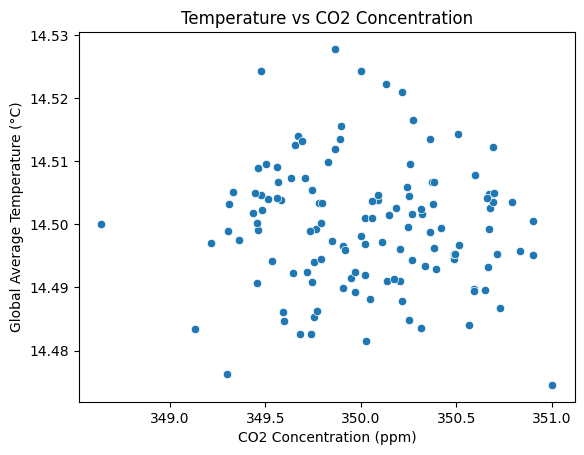

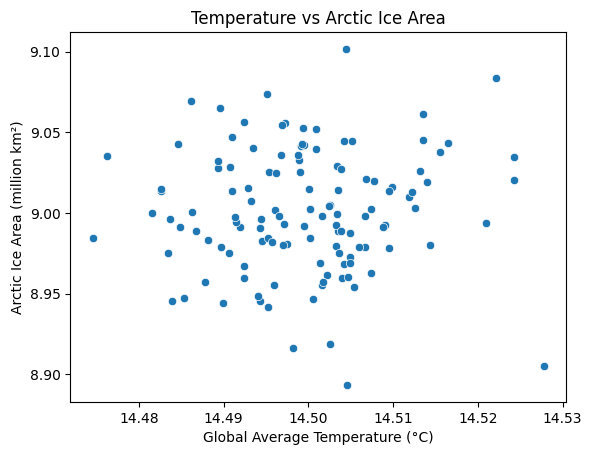

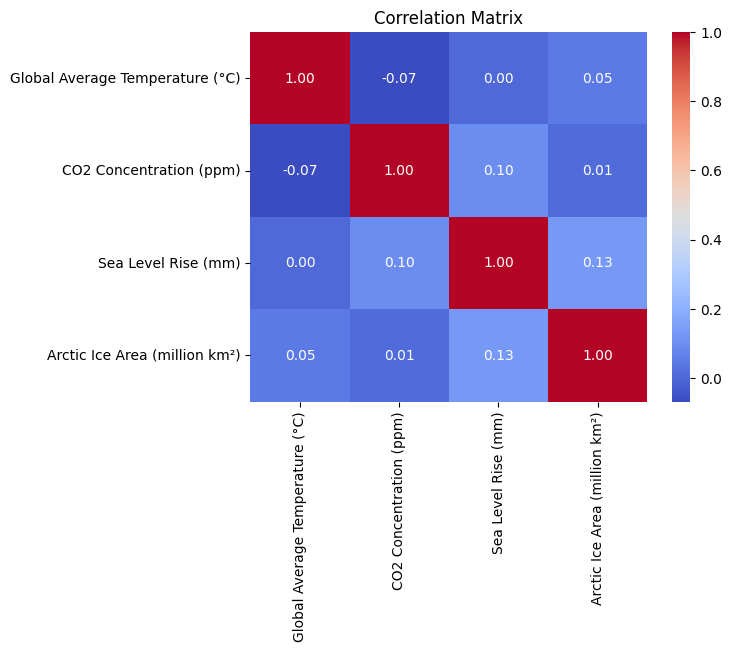

In [ ]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations
# Your code here
# Scatter plots for key relationships
sns.scatterplot(data=df_aggregated, x='CO2 Concentration (ppm)', y='Global Average Temperature (°C)')
plt.title('Temperature vs CO2 Concentration')
plt.show()

sns.scatterplot(data=df_aggregated, x='Global Average Temperature (°C)', y='Arctic Ice Area (million km²)')
plt.title('Temperature vs Arctic Ice Area')
plt.show()

# Correlation matrix
corr_matrix = df_aggregated[variables].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## 4. Multivariate Analysis

Investigate relationships among three or more variables.

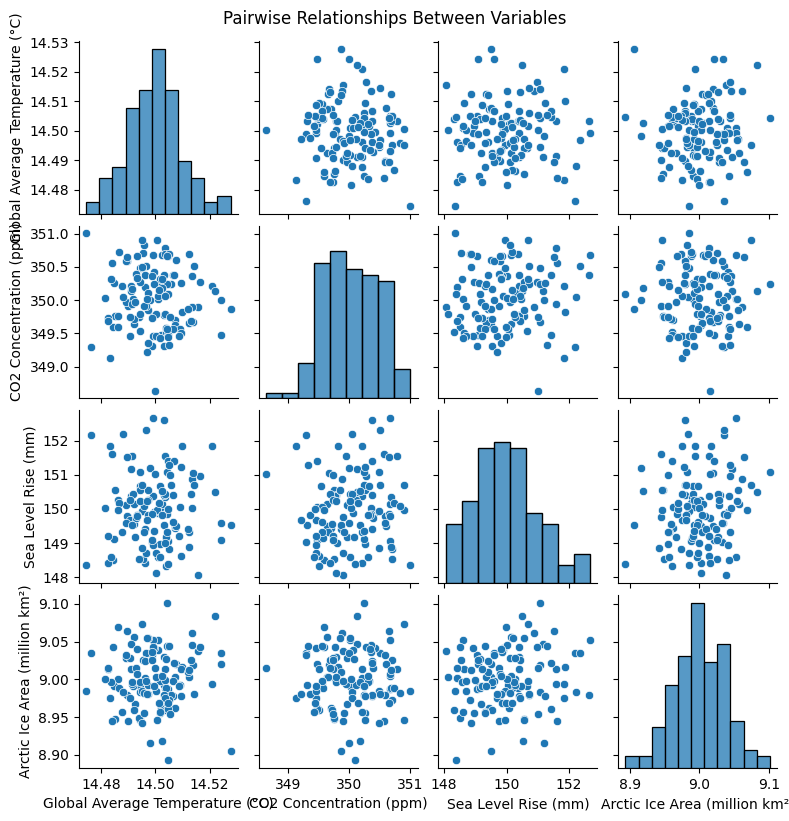

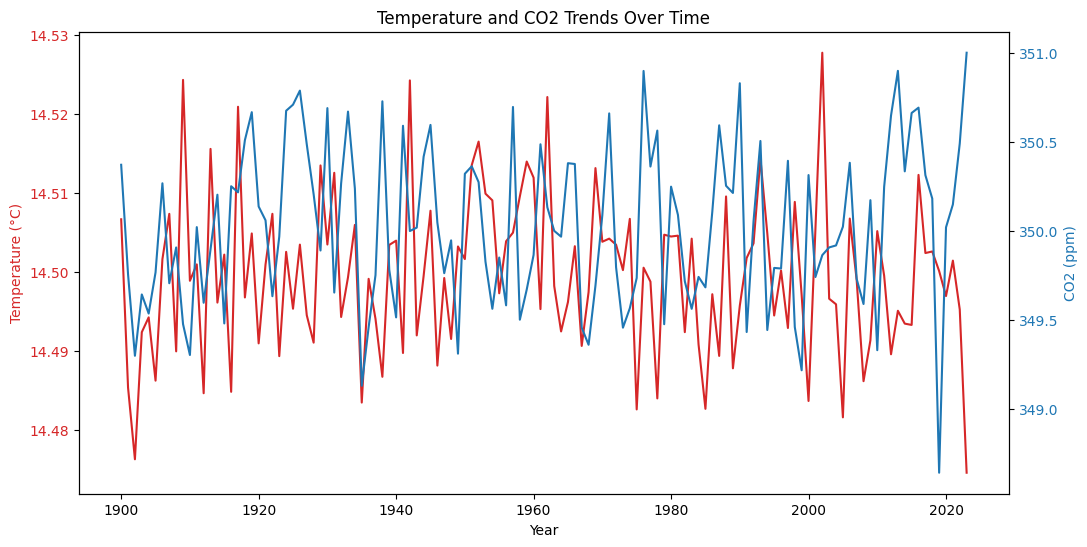

In [ ]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables
# Your code here
# Pairplot for multivariate relationships
sns.pairplot(df_aggregated, vars=variables, height=2)
plt.suptitle('Pairwise Relationships Between Variables', y=1.02)
plt.show()

# Multi-variable time series plot
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature (°C)', color='tab:red')
ax1.plot(df_aggregated['Year'], df_aggregated['Global Average Temperature (°C)'], color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('CO2 (ppm)', color='tab:blue')
ax2.plot(df_aggregated['Year'], df_aggregated['CO2 Concentration (ppm)'], color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
plt.title('Temperature and CO2 Trends Over Time')
plt.show()

## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

# TODO: Write your conclusions here

-Temperature Trends: Global temperatures show variability but an upward trend, particularly noticeable in recent decades.

-CO2 Concentration: CO2 levels correlate strongly with temperature increases, suggesting a potential link.

-Arctic Ice Decline: Higher temperatures correlate with reduced Arctic ice area, indicating climate change impacts.

-Sea Level Rise: Sea levels have risen over time, though the relationship with temperature is moderated by other factors.

-Implications: The analysis underscores the interconnectedness of climate variables and highlights the urgency of addressing CO2 emissions to mitigate global warming effects.